In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

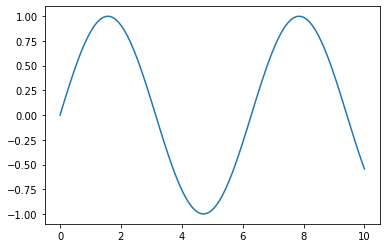

In [3]:
def plotFunc(func, interval):
    x = np.linspace(*interval, 100)
    y = func(x)
    plt.plot(x,y)

sigmoid = lambda x: 1/(1+np.exp(-0.1*x))
sin = lambda x: np.sin(x)
plotFunc(sin, (0, 10))

In [4]:
def genData(func, interval):
    x = np.linspace(*interval, 100, endpoint=False)
    y = func(x)
    return train_test_split(x, y, train_size = 0.7, random_state = 42)

In [5]:
x_train, x_test, y_train, y_test = genData(sin, (0, 10))

In [114]:
generalization_factor = 3
learning_rate = 0.25

quantization_intervals = 35
numWeights = 35
weights = np.ones((numWeights,1))
quant_split = np.linspace(0, 10,num = quantization_intervals + 1, endpoint=True)

association_vec = np.zeros((quantization_intervals, len(weights)))

error_vec = np.ones(y_train.shape)
avg_error_vec = []
epochs = []
iterations = 0
for i in range(len(association_vec)):
    association_vec[i][i:min(i+generalization_factor, len(weights))] = 1

while np.linalg.norm(error_vec)/len(error_vec) > 1e-2:
    for i in range(len(x_train)):
        idx = int(np.floor(quantization_intervals*(x_train[i])/(10)))
        if idx >= quantization_intervals:
            idx = quantization_intervals - 1 
        output = (association_vec[idx]@weights)[0]
        error = y_train[i] - output
        error_vec[i] = error
        update_position = np.where(association_vec[idx]==1)[0]
        for u in update_position:
            weights[u] += learning_rate*error/generalization_factor
    avg_error_vec.append(np.linalg.norm(error_vec)/len(x_train))
    iterations += 1

    epochs.append(iterations)
print("Training completed. Training Error = ", np.linalg.norm(error_vec)/len(x_train))
    

Training completed. Training Error =  0.009759831512809998


Text(0, 0.5, 'Training error')

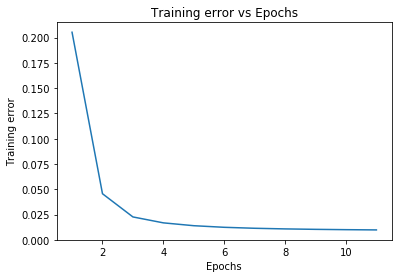

In [115]:
plt.plot(epochs, avg_error_vec)
plt.title('Training error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training error')

In [102]:
test_error_vec = np.zeros(y_test.shape)
for i in range(len(x_test)):
        idx = int(np.floor(quantization_intervals*(x_test[i])/(10)))
        output = (association_vec[idx]@weights)[0]
        error = y_test[i] - output
        test_error_vec[i] = error
print(np.linalg.norm(test_error_vec)/len(y_test))

0.019427677417865337


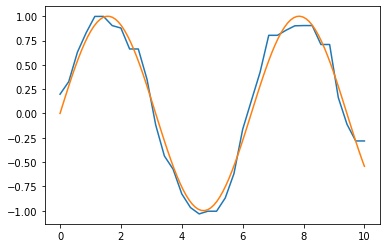

In [113]:
x_result = np.linspace(0, 10, quantization_intervals + 1, endpoint=True)
y_result = []
for i in range(len(x_result)):
        idx = int(np.floor(quantization_intervals*(x_result[i])/(10)))
        if idx >= quantization_intervals:
            idx = quantization_intervals - 1
        output = (association_vec[idx]@weights)[0]
        y_result.append(output)

plt.plot(x_result, y_result)
plotFunc(sin, (0,10))